## Data Visualization

In [1]:
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the processed dataset
df = pd.read_csv('../data/dataset_domestic_processed.csv')

### Genre

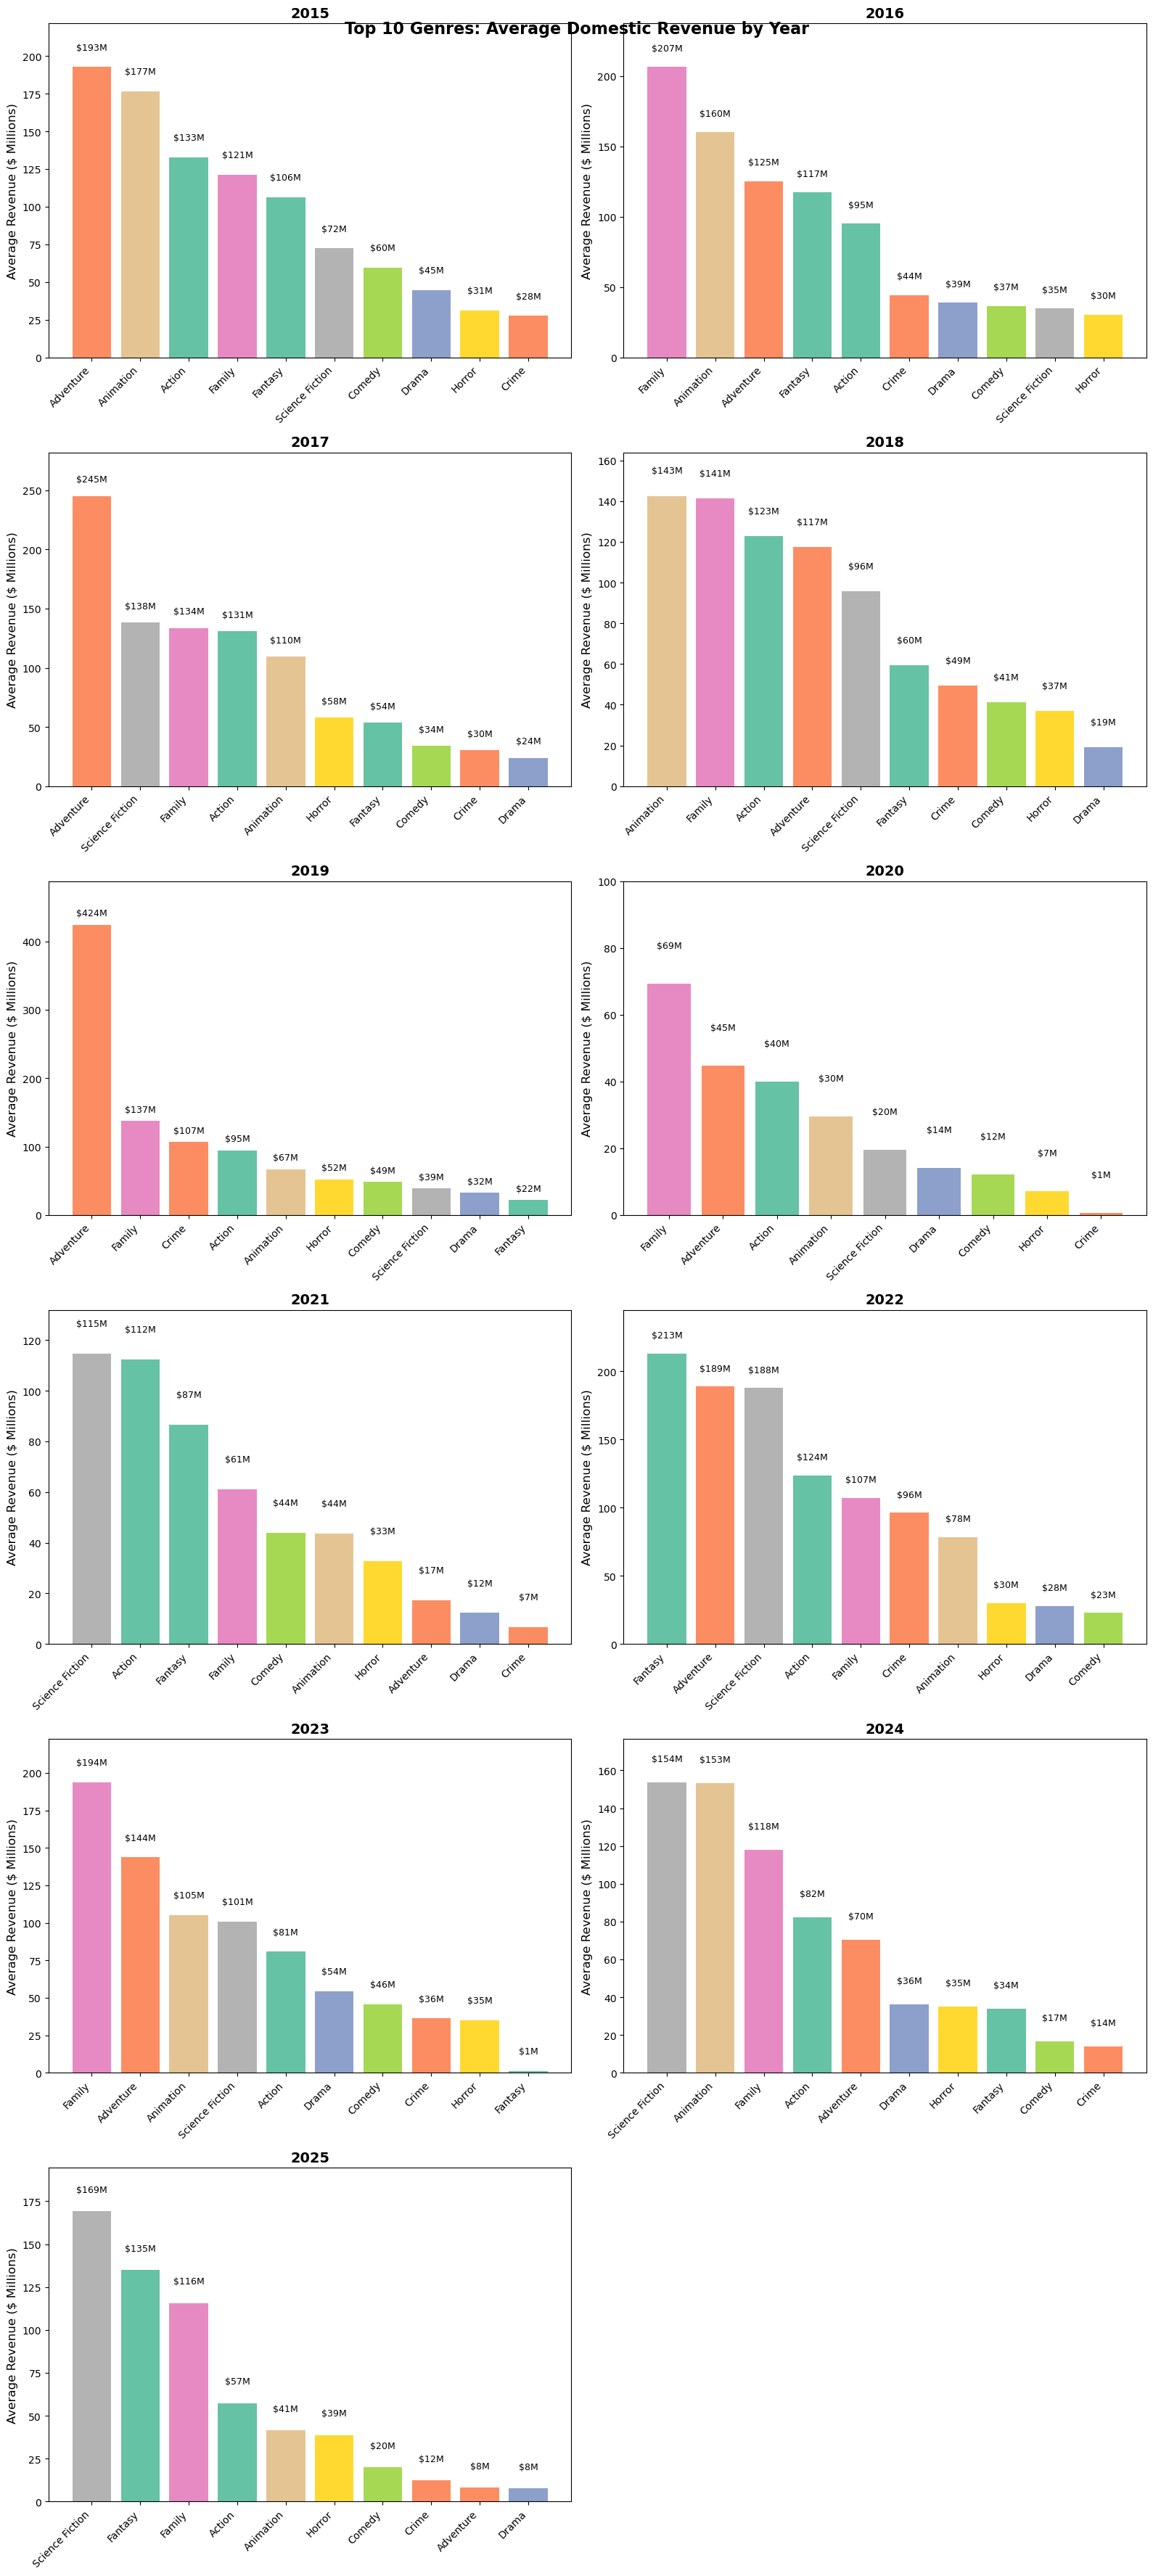


🎬 Genre Revenue Analysis (2015-2025):

Top 10 Genres by Average Domestic Revenue:
 1. Adventure       $174M avg ( 60 movies, total: $10.46B)
 2. Family          $129M avg ( 69 movies, total: $8.92B)
 3. Animation       $103M avg ( 63 movies, total: $6.51B)
 4. Science Fiction $103M avg ( 56 movies, total: $5.75B)
 5. Action          $101M avg (248 movies, total: $25.12B)
 6. Fantasy         $92M avg ( 33 movies, total: $3.03B)
 7. Music           $48M avg ( 18 movies, total: $0.87B)
 8. War             $42M avg ( 14 movies, total: $0.59B)
 9. Crime           $40M avg ( 52 movies, total: $2.10B)
10. Comedy          $39M avg (203 movies, total: $7.84B)

Genre Performance Insights:
------------------------------
Highest avg revenue: Adventure ($174M avg)
Most movies produced: Drama (313 movies)

Total movies by primary genre: 1,531
Total domestic revenue: $92.5B


In [3]:
### Genre Revenue by Year Visualization

# Get top 10 primary genres by total revenue
top_10_genres = (df.groupby('primary_genre')['revenue_domestic']
                 .sum()
                 .sort_values(ascending=False)
                 .head(10)
                 .index.tolist())

# Create data for visualization by year
years = sorted(df['release_year'].unique())
genre_revenue_by_year = {}

for year in years:
    year_data = df[df['release_year'] == year]
    
    # Get average revenue by primary genre for this year, only for top 10
    year_revenue = (year_data[year_data['primary_genre'].isin(top_10_genres)]
                    .groupby('primary_genre')['revenue_domestic']
                    .mean()
                    .reindex(top_10_genres, fill_value=0))
    
    genre_revenue_by_year[year] = year_revenue

# Create subplots - one per year
n_years = len(years)
cols = 2
rows = (n_years + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, 6*rows))
fig.suptitle('Top 10 Genres: Average Domestic Revenue by Year', fontsize=16, fontweight='bold')

# Flatten axes for easier indexing
if rows > 1:
    axes = axes.flatten()
elif rows == 1 and cols > 1:
    axes = [axes] if n_years == 1 else axes
else:
    axes = [axes]

# Define colors for consistency across years - using a different palette for genres
colors = sns.color_palette("Set2", len(top_10_genres))
color_map = dict(zip(top_10_genres, colors))

for i, year in enumerate(years):
    ax = axes[i]
    
    year_revenue = genre_revenue_by_year[year]
    # Only show genres with revenue > 0 for this year
    year_revenue_filtered = year_revenue[year_revenue > 0].sort_values(ascending=False)
    
    if len(year_revenue_filtered) > 0:
        genre_colors = [color_map[genre] for genre in year_revenue_filtered.index]
        
        bars = ax.bar(range(len(year_revenue_filtered)), 
                     year_revenue_filtered.values / 1e6,  # Convert to millions
                     color=genre_colors)
        
        ax.set_title(f'{year}', fontsize=14, fontweight='bold')
        ax.set_ylabel('Average Revenue ($ Millions)', fontsize=12)
        ax.set_xticks(range(len(year_revenue_filtered)))
        ax.set_xticklabels(year_revenue_filtered.index, 
                          rotation=45, ha='right', fontsize=10)
        
        # Add value labels on bars
        for bar, value in zip(bars, year_revenue_filtered.values):
            if value > 0:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                       f'${value/1e6:.0f}M', ha='center', va='bottom', fontsize=9)
        
        # Set y-axis limit for consistency
        ax.set_ylim(0, max(year_revenue_filtered.max() / 1e6 * 1.15, 100))
        
    else:
        ax.set_title(f'{year} (No Data)', fontsize=14)
        ax.set_ylabel('Average Revenue ($ Millions)', fontsize=12)

# Hide empty subplots
for i in range(n_years, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Summary statistics for genres
print(f"\n🎬 Genre Revenue Analysis ({min(years)}-{max(years)}):")
print("=" * 50)

avg_revenue_by_genre = df.groupby('primary_genre')['revenue_domestic'].mean().sort_values(ascending=False)
print("\nTop 10 Genres by Average Domestic Revenue:")
for i, (genre, avg_revenue) in enumerate(avg_revenue_by_genre.head(10).items(), 1):
    total_revenue = df[df['primary_genre'] == genre]['revenue_domestic'].sum()
    movie_count = len(df[df['primary_genre'] == genre])
    print(f"{i:2d}. {genre:15s} ${avg_revenue/1e6:.0f}M avg ({movie_count:3d} movies, total: ${total_revenue/1e9:.2f}B)")

# Genre performance comparison
print(f"\nGenre Performance Insights:")
print("-" * 30)

# Most profitable genres (highest average revenue)
print(f"Highest avg revenue: {avg_revenue_by_genre.index[0]} (${avg_revenue_by_genre.iloc[0]/1e6:.0f}M avg)")

# Most prolific genres (most movies)
movie_count_by_genre = df['primary_genre'].value_counts()
print(f"Most movies produced: {movie_count_by_genre.index[0]} ({movie_count_by_genre.iloc[0]} movies)")

print(f"\nTotal movies by primary genre: {len(df):,}")
print(f"Total domestic revenue: ${df['revenue_domestic'].sum()/1e9:.1f}B")

### Release Month and Season


Revenue by release month:
                    avg_revenue  movie_count
release_month_name                          
January              36806011.0           86
February             53364821.0          108
March                58289173.0          139
April                53684156.0          129
May                  79992877.0          120
June                 78841116.0          136
July                 97520903.0          120
August               36275499.0          139
September            39542744.0          131
October              38172101.0          144
November             68269210.0          138
December             80970460.0          141

Revenue by season:
                avg_revenue  movie_count
release_season                          
Fall             48663518.0          413
Spring           63470609.0          388
Summer           69537201.0          395
Winter           60732992.0          335


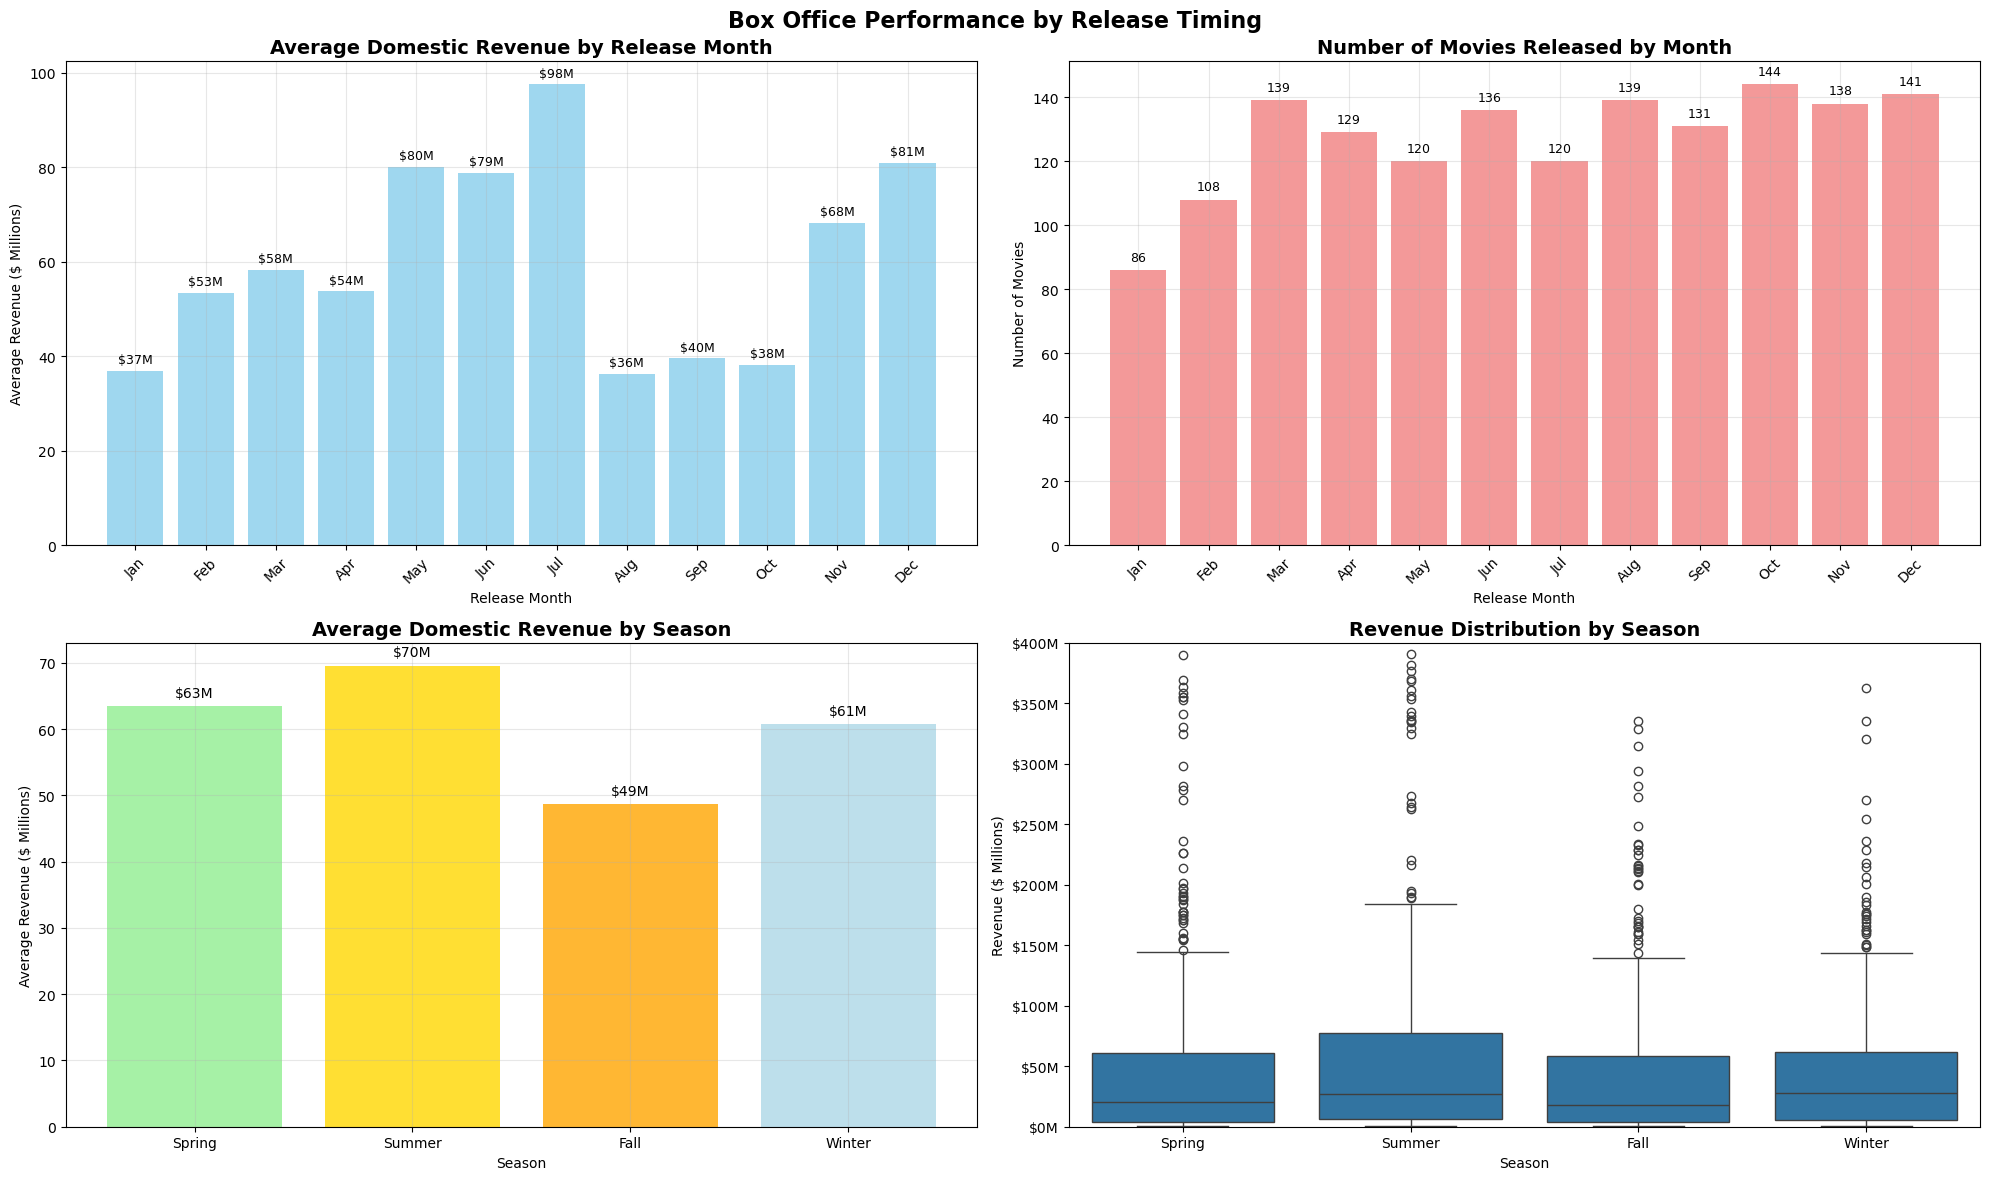


🎬 Release Timing Analysis:
Best performing month: July ($98M avg)
Worst performing month: August ($36M avg)
Best performing season: Summer ($70M avg)
Worst performing season: Fall ($49M avg)

Special Season Performance:
Summer blockbuster season (May-Aug): $72M avg
Holiday season (Nov-Dec): $75M avg
Oscar season (Oct-Dec): $62M avg


In [4]:
# Revenue analysis by month and season
monthly_revenue = df.groupby('release_month_name')['revenue_domestic'].agg(['mean', 'count']).round(0)
monthly_revenue.columns = ['avg_revenue', 'movie_count']
monthly_revenue = monthly_revenue.reindex(['January', 'February', 'March', 'April', 'May', 'June', 
                                          'July', 'August', 'September', 'October', 'November', 'December'])

seasonal_revenue = df.groupby('release_season')['revenue_domestic'].agg(['mean', 'count']).round(0)
seasonal_revenue.columns = ['avg_revenue', 'movie_count']

print(f"\nRevenue by release month:")
print(monthly_revenue)

print(f"\nRevenue by season:")
print(seasonal_revenue)

### Release Month and Season Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Box Office Performance by Release Timing', fontsize=16, fontweight='bold')

# 1. Average Revenue by Month
ax1 = axes[0, 0]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg = [monthly_revenue.loc[month, 'avg_revenue'] for month in monthly_revenue.index]

bars1 = ax1.bar(months, [x/1e6 for x in monthly_avg], color='skyblue', alpha=0.8)
ax1.set_title('Average Domestic Revenue by Release Month', fontsize=14, fontweight='bold')
ax1.set_xlabel('Release Month')
ax1.set_ylabel('Average Revenue ($ Millions)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars1, monthly_avg):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
            f'${value/1e6:.0f}M', ha='center', va='bottom', fontsize=9)

# 2. Movie Count by Month
ax2 = axes[0, 1]
monthly_counts = [monthly_revenue.loc[month, 'movie_count'] for month in monthly_revenue.index]

bars2 = ax2.bar(months, monthly_counts, color='lightcoral', alpha=0.8)
ax2.set_title('Number of Movies Released by Month', fontsize=14, fontweight='bold')
ax2.set_xlabel('Release Month')
ax2.set_ylabel('Number of Movies')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars2, monthly_counts):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 2,
            f'{int(value)}', ha='center', va='bottom', fontsize=9)

# 3. Average Revenue by Season
ax3 = axes[1, 0]
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
season_colors = ['lightgreen', 'gold', 'orange', 'lightblue']
seasonal_avg = [seasonal_revenue.loc[season, 'avg_revenue'] for season in seasons]

bars3 = ax3.bar(seasons, [x/1e6 for x in seasonal_avg], color=season_colors, alpha=0.8)
ax3.set_title('Average Domestic Revenue by Season', fontsize=14, fontweight='bold')
ax3.set_xlabel('Season')
ax3.set_ylabel('Average Revenue ($ Millions)')
ax3.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars3, seasonal_avg):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
            f'${value/1e6:.0f}M', ha='center', va='bottom', fontsize=10)

# 4. Box Plot: Revenue Distribution by Season
ax4 = axes[1, 1]
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
sns.boxplot(data=df, x='release_season', y='revenue_domestic', order=season_order, ax=ax4)
ax4.set_title('Revenue Distribution by Season', fontsize=14, fontweight='bold')
ax4.set_xlabel('Season')
ax4.set_ylabel('Revenue ($ Millions)')
ax4.set_ylim(0, 400e6)  # Limit y-axis to better show the distribution
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))

plt.tight_layout()
plt.show()

# Summary insights
print(f"\n🎬 Release Timing Analysis:")
print("=" * 50)

best_month = monthly_revenue['avg_revenue'].idxmax()
worst_month = monthly_revenue['avg_revenue'].idxmin()
best_season = seasonal_revenue['avg_revenue'].idxmax()
worst_season = seasonal_revenue['avg_revenue'].idxmin()

print(f"Best performing month: {best_month} (${monthly_revenue.loc[best_month, 'avg_revenue']/1e6:.0f}M avg)")
print(f"Worst performing month: {worst_month} (${monthly_revenue.loc[worst_month, 'avg_revenue']/1e6:.0f}M avg)")
print(f"Best performing season: {best_season} (${seasonal_revenue.loc[best_season, 'avg_revenue']/1e6:.0f}M avg)")
print(f"Worst performing season: {worst_season} (${seasonal_revenue.loc[worst_season, 'avg_revenue']/1e6:.0f}M avg)")

# Special season performance
summer_avg = df[df['is_summer_blockbuster'] == 1]['revenue_domestic'].mean()
holiday_avg = df[df['is_holiday_release'] == 1]['revenue_domestic'].mean()
oscar_avg = df[df['is_oscar_season'] == 1]['revenue_domestic'].mean()

print(f"\nSpecial Season Performance:")
print(f"Summer blockbuster season (May-Aug): ${summer_avg/1e6:.0f}M avg")
print(f"Holiday season (Nov-Dec): ${holiday_avg/1e6:.0f}M avg")
print(f"Oscar season (Oct-Dec): ${oscar_avg/1e6:.0f}M avg")

### Holiday Revenue


Holiday proximity breakdown:
nearest_holiday
Veterans Day                  102
Columbus Day                   99
Presidents Day                 84
Christmas                      83
Memorial Day                   83
Independence Day               82
Labor Day                      80
Thanksgiving                   55
Martin Luther King Jr. Day     48
New Year's Day                 18
Name: count, dtype: int64

Specific holiday proximity flags:
Christmas/New Year proximity: 101
Thanksgiving proximity: 55
Independence Day proximity: 82
Memorial/Labor Day proximity: 163

Revenue comparison:
Holiday proximity releases: $66.3M avg
Non-holiday releases: $55.0M avg
Holiday proximity advantage: 20.6%

Sample movies with holiday proximity:
                                       title release_date             nearest_holiday  days_to_holiday  revenue_domestic
0                         The Wedding Ringer   2015-01-16  Martin Luther King Jr. Day              1.0        64460211.0
1                 

/var/folders/zf/7fpxnmz10_vdj37z23fc6vcr0000gn/T/ipykernel_53945/556949221.py:122: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(holiday_group_data, labels=holiday_group_labels)


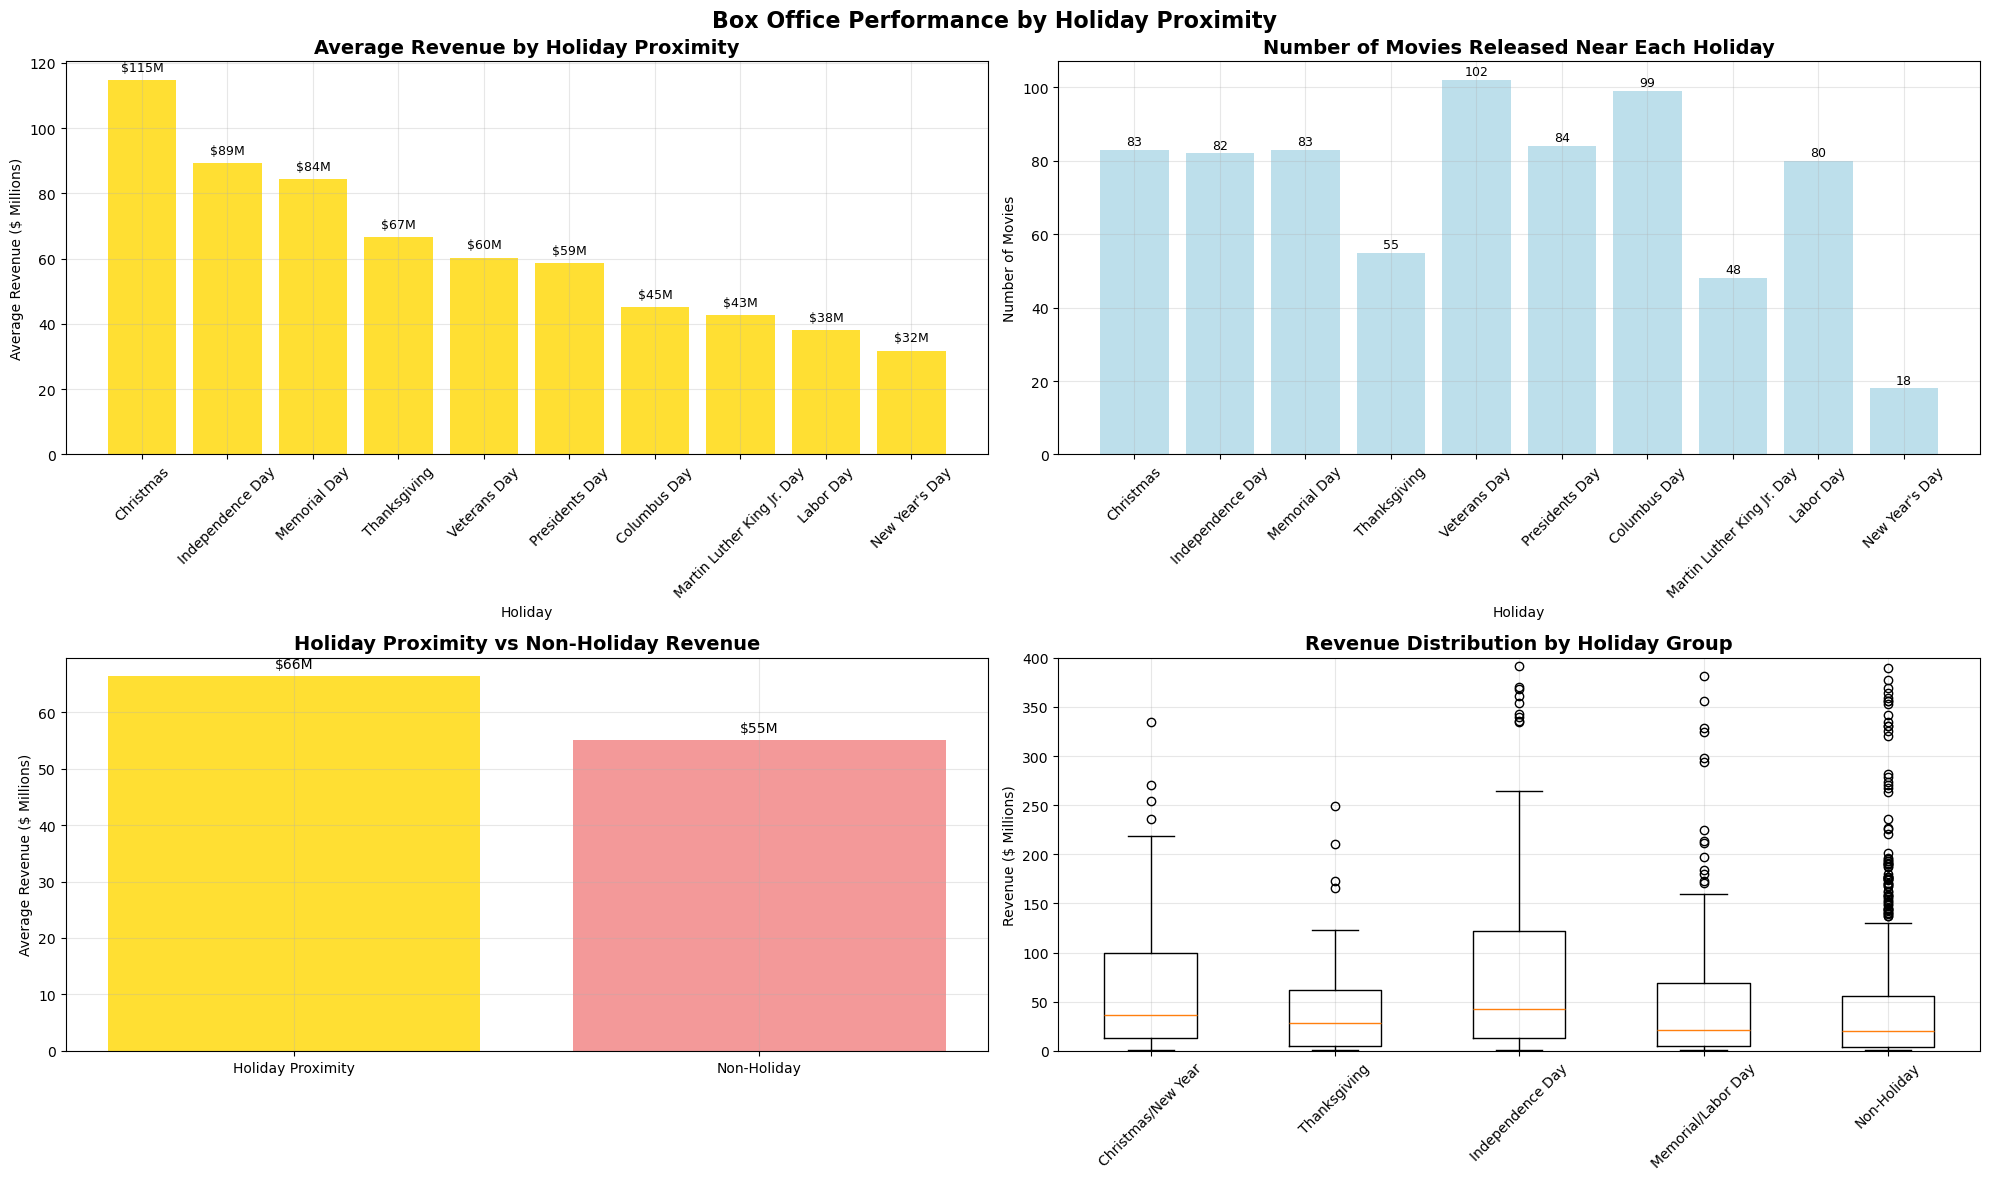


🎄 Holiday Revenue Performance Insights:
Best performing holiday: Christmas ($115M avg)
Least performing holiday: New Year's Day ($32M avg)

Top 3 holidays by average revenue:
1. Christmas: $115M avg (83 movies)
2. Independence Day: $89M avg (82 movies)
3. Memorial Day: $84M avg (83 movies)


In [5]:
### Holiday Revenue Visualizations
if df['is_holiday_proximity'].sum() > 0:
    print(f"\nHoliday proximity breakdown:")
    holiday_counts = df[df['is_holiday_proximity'] == 1]['nearest_holiday'].value_counts()
    print(holiday_counts)
    
    print(f"\nSpecific holiday proximity flags:")
    print(f"Christmas/New Year proximity: {df['is_christmas_proximity'].sum()}")
    print(f"Thanksgiving proximity: {df['is_thanksgiving_proximity'].sum()}")
    print(f"Independence Day proximity: {df['is_independence_day_proximity'].sum()}")
    print(f"Memorial/Labor Day proximity: {df['is_memorial_labor_day_proximity'].sum()}")
    
    # Revenue comparison
    holiday_prox_avg = df[df['is_holiday_proximity'] == 1]['revenue_domestic'].mean()
    non_holiday_avg = df[df['is_holiday_proximity'] == 0]['revenue_domestic'].mean()
    
    print(f"\nRevenue comparison:")
    print(f"Holiday proximity releases: ${holiday_prox_avg/1e6:.1f}M avg")
    print(f"Non-holiday releases: ${non_holiday_avg/1e6:.1f}M avg")
    if non_holiday_avg > 0:
        print(f"Holiday proximity advantage: {(holiday_prox_avg/non_holiday_avg - 1)*100:.1f}%")

# Sample of movies with holiday proximity
print(f"\nSample movies with holiday proximity:")
holiday_movies = df[df['is_holiday_proximity'] == 1][['title', 'release_date', 'nearest_holiday', 'days_to_holiday', 'revenue_domestic']].head(10)
if len(holiday_movies) > 0:
    print(holiday_movies.to_string())

    
if df['is_holiday_proximity'].sum() > 0:
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Prepare holiday revenue data
    holiday_revenue_data = df[df['is_holiday_proximity'] == 1].groupby('nearest_holiday').agg({
        'revenue_domestic': ['mean', 'count', 'sum'],
        'title': 'count'
    }).round(0)
    
    holiday_revenue_data.columns = ['avg_revenue', 'movie_count', 'total_revenue', 'title_count']
    holiday_revenue_data = holiday_revenue_data.sort_values('avg_revenue', ascending=False)
    
    # Only show holidays with at least 2 movies for meaningful comparison
    holiday_revenue_data = holiday_revenue_data[holiday_revenue_data['movie_count'] >= 2]
    
    if len(holiday_revenue_data) > 0:
        fig, axes = plt.subplots(2, 2, figsize=(20, 12))
        fig.suptitle('Box Office Performance by Holiday Proximity', fontsize=16, fontweight='bold')
        
        # 1. Average Revenue by Holiday
        ax1 = axes[0, 0]
        holidays = holiday_revenue_data.index
        avg_revenues = holiday_revenue_data['avg_revenue'] / 1e6
        
        bars1 = ax1.bar(holidays, avg_revenues, color='gold', alpha=0.8)
        ax1.set_title('Average Revenue by Holiday Proximity', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Holiday')
        ax1.set_ylabel('Average Revenue ($ Millions)')
        ax1.tick_params(axis='x', rotation=45)
        ax1.grid(True, alpha=0.3)
        
        # Add value labels
        for bar, value in zip(bars1, avg_revenues):
            ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 2,
                    f'${value:.0f}M', ha='center', va='bottom', fontsize=9)
        
        # 2. Movie Count by Holiday
        ax2 = axes[0, 1]
        movie_counts = holiday_revenue_data['movie_count']
        
        bars2 = ax2.bar(holidays, movie_counts, color='lightblue', alpha=0.8)
        ax2.set_title('Number of Movies Released Near Each Holiday', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Holiday')
        ax2.set_ylabel('Number of Movies')
        ax2.tick_params(axis='x', rotation=45)
        ax2.grid(True, alpha=0.3)
        
        # Add value labels
        for bar, value in zip(bars2, movie_counts):
            ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
                    f'{int(value)}', ha='center', va='bottom', fontsize=9)
        
        # 3. Holiday vs Non-Holiday Comparison
        ax3 = axes[1, 0]
        comparison_data = ['Holiday Proximity', 'Non-Holiday']
        comparison_revenues = [holiday_prox_avg / 1e6, non_holiday_avg / 1e6]
        comparison_colors = ['gold', 'lightcoral']
        
        bars3 = ax3.bar(comparison_data, comparison_revenues, color=comparison_colors, alpha=0.8)
        ax3.set_title('Holiday Proximity vs Non-Holiday Revenue', fontsize=14, fontweight='bold')
        ax3.set_ylabel('Average Revenue ($ Millions)')
        ax3.grid(True, alpha=0.3)
        
        # Add value labels
        for bar, value in zip(bars3, comparison_revenues):
            ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                    f'${value:.0f}M', ha='center', va='bottom', fontsize=10)
        
        # 4. Box Plot: Revenue Distribution by Major Holiday Groups
        ax4 = axes[1, 1]
        
        # Create holiday groups for box plot
        holiday_group_data = []
        holiday_group_labels = []
        
        # Group similar holidays together for cleaner visualization
        holiday_groups = {
            'Christmas/New Year': df[df['is_christmas_proximity'] == 1]['revenue_domestic'],
            'Thanksgiving': df[df['is_thanksgiving_proximity'] == 1]['revenue_domestic'],
            'Independence Day': df[df['is_independence_day_proximity'] == 1]['revenue_domestic'],
            'Memorial/Labor Day': df[df['is_memorial_labor_day_proximity'] == 1]['revenue_domestic'],
            'Non-Holiday': df[df['is_holiday_proximity'] == 0]['revenue_domestic']
        }
        
        # Only include groups with sufficient data
        for group_name, group_data in holiday_groups.items():
            if len(group_data) >= 5:  # At least 5 movies for meaningful box plot
                holiday_group_data.append(group_data / 1e6)  # Convert to millions
                holiday_group_labels.append(group_name)
        
        if len(holiday_group_data) > 1:
            ax4.boxplot(holiday_group_data, labels=holiday_group_labels)
            ax4.set_title('Revenue Distribution by Holiday Group', fontsize=14, fontweight='bold')
            ax4.set_ylabel('Revenue ($ Millions)')
            ax4.tick_params(axis='x', rotation=45)
            ax4.set_ylim(0, 400)  # Limit for better visualization
            ax4.grid(True, alpha=0.3)
        else:
            ax4.text(0.5, 0.5, 'Insufficient data for\nholiday group comparison', 
                    ha='center', va='center', transform=ax4.transAxes, fontsize=12)
            ax4.set_title('Revenue Distribution by Holiday Group', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Summary insights
        print(f"\n🎄 Holiday Revenue Performance Insights:")
        print("=" * 50)
        
        if len(holiday_revenue_data) > 0:
            best_holiday = holiday_revenue_data.index[0]
            best_revenue = holiday_revenue_data.iloc[0]['avg_revenue']
            print(f"Best performing holiday: {best_holiday} (${best_revenue/1e6:.0f}M avg)")
            
            worst_holiday = holiday_revenue_data.index[-1]
            worst_revenue = holiday_revenue_data.iloc[-1]['avg_revenue']
            print(f"Least performing holiday: {worst_holiday} (${worst_revenue/1e6:.0f}M avg)")
            
            print(f"\nTop 3 holidays by average revenue:")
            for i, (holiday, data) in enumerate(holiday_revenue_data.head(3).iterrows(), 1):
                print(f"{i}. {holiday}: ${data['avg_revenue']/1e6:.0f}M avg ({int(data['movie_count'])} movies)")
    
    else:
        print("\nNot enough holiday proximity data for meaningful visualization (need at least 2 movies per holiday)")
else:
    print("\nNo movies found within 10 days of major holidays")

### Competition


Competition intensity distribution:
competition_intensity
High      1217
Medium     268
Low         46
Name: count, dtype: int64

Competition statistics:
Average nearby major releases: 4.4
Maximum nearby major releases: 11

Specific competition flags:
Has blockbuster competition (200M+): 981
Has immediate competition (≤7 days): 1383

Revenue impact of competition:
No nearby competition: $29.0M avg
With nearby competition: $61.4M avg
Competition impact: +111.8%

Revenue by competition intensity:
Low: $29.0M avg (46 movies)
Medium: $68.1M avg (268 movies)
High: $59.9M avg (1217 movies)

Sample movies with high competition:
                                       title release_date  revenue_domestic  nearby_major_releases_count  nearby_major_releases_max_revenue  days_to_nearest_major_release
2                              Strange Magic   2015-01-23        12429583.0                            2                          162994032                            7.0
3                           

/var/folders/zf/7fpxnmz10_vdj37z23fc6vcr0000gn/T/ipykernel_53945/1567746063.py:116: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(box_data, labels=box_labels, patch_artist=True)


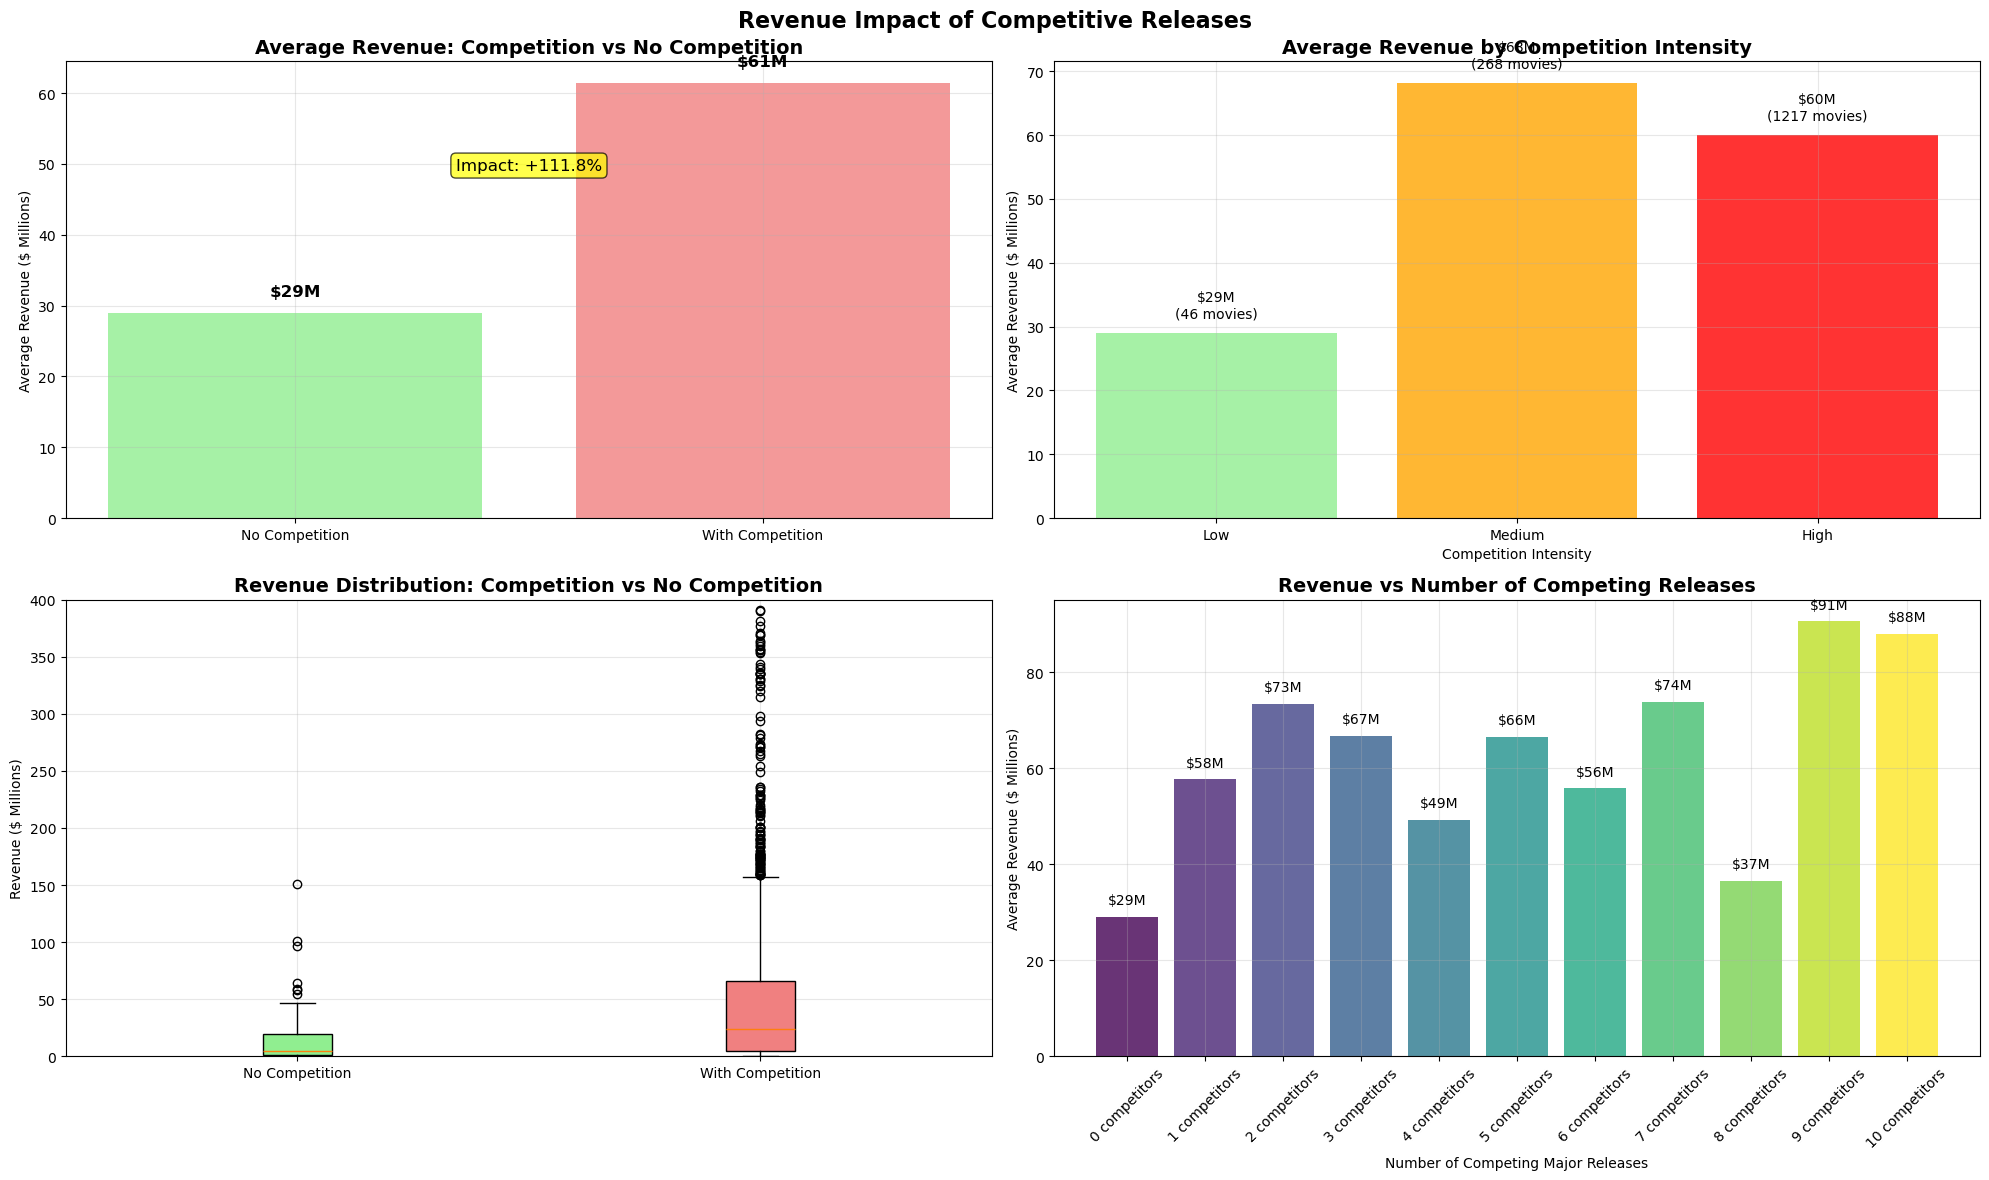


🎬 Competition Impact Insights:
Blockbuster competition impact:
Against blockbuster (200M+): $57M avg
No blockbuster competition: $67M avg
Blockbuster competition impact: -15.6%

Immediate competition impact (≤7 days):
Immediate competition: $61M avg
No immediate competition: $58M avg
Immediate competition impact: +4.7%


In [6]:
### Competition Impact Visualizations
if df['has_nearby_major_release'].sum() > 0:
    print(f"\nCompetition intensity distribution:")
    intensity_counts = df['competition_intensity'].value_counts()
    print(intensity_counts)
    
    print(f"\nCompetition statistics:")
    avg_nearby = df[df['has_nearby_major_release'] == 1]['nearby_major_releases_count'].mean()
    max_nearby = df['nearby_major_releases_count'].max()
    print(f"Average nearby major releases: {avg_nearby:.1f}")
    print(f"Maximum nearby major releases: {int(max_nearby)}")
    
    print(f"\nSpecific competition flags:")
    print(f"Has blockbuster competition (200M+): {df['has_blockbuster_competition'].sum()}")
    print(f"Has immediate competition (≤7 days): {df['has_immediate_competition'].sum()}")
    
    # Revenue impact analysis
    no_competition_avg = df[df['has_nearby_major_release'] == 0]['revenue_domestic'].mean()
    with_competition_avg = df[df['has_nearby_major_release'] == 1]['revenue_domestic'].mean()
    
    print(f"\nRevenue impact of competition:")
    print(f"No nearby competition: ${no_competition_avg/1e6:.1f}M avg")
    print(f"With nearby competition: ${with_competition_avg/1e6:.1f}M avg")
    if no_competition_avg > 0:
        impact = (with_competition_avg/no_competition_avg - 1) * 100
        print(f"Competition impact: {impact:+.1f}%")
    
    # Competition by intensity
    print(f"\nRevenue by competition intensity:")
    for intensity in ['Low', 'Medium', 'High']:
        if intensity in df['competition_intensity'].values:
            intensity_avg = df[df['competition_intensity'] == intensity]['revenue_domestic'].mean()
            intensity_count = (df['competition_intensity'] == intensity).sum()
            print(f"{intensity}: ${intensity_avg/1e6:.1f}M avg ({intensity_count} movies)")

# Sample movies with high competition
print(f"\nSample movies with high competition:")
high_competition = df[df['nearby_major_releases_count'] >= 2][
    ['title', 'release_date', 'revenue_domestic', 'nearby_major_releases_count', 
     'nearby_major_releases_max_revenue', 'days_to_nearest_major_release']
].head(10)

if len(high_competition) > 0:
    print(high_competition.to_string())
else:
    print("No movies found with high competition (2+ nearby major releases)")


if df['has_nearby_major_release'].sum() > 0:
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    fig.suptitle('Revenue Impact of Competitive Releases', fontsize=16, fontweight='bold')
    
    # 1. Competition vs No Competition Revenue Comparison
    ax1 = axes[0, 0]
    competition_data = ['No Competition', 'With Competition']
    competition_revenues = [no_competition_avg / 1e6, with_competition_avg / 1e6]
    competition_colors = ['lightgreen', 'lightcoral']
    
    bars1 = ax1.bar(competition_data, competition_revenues, color=competition_colors, alpha=0.8)
    ax1.set_title('Average Revenue: Competition vs No Competition', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Average Revenue ($ Millions)')
    ax1.grid(True, alpha=0.3)
    
    # Add value labels and percentage difference
    for bar, value in zip(bars1, competition_revenues):
        ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 2,
                f'${value:.0f}M', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Add percentage difference annotation
    if no_competition_avg > 0:
        pct_diff = (with_competition_avg/no_competition_avg - 1) * 100
        ax1.text(0.5, max(competition_revenues) * 0.8, f'Impact: {pct_diff:+.1f}%', 
                ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    # 2. Revenue by Competition Intensity
    ax2 = axes[0, 1]
    intensity_order = ['Low', 'Medium', 'High']
    intensity_revenues = []
    intensity_counts = []
    
    for intensity in intensity_order:
        if intensity in df['competition_intensity'].values:
            intensity_avg = df[df['competition_intensity'] == intensity]['revenue_domestic'].mean()
            intensity_count = (df['competition_intensity'] == intensity).sum()
            intensity_revenues.append(intensity_avg / 1e6)
            intensity_counts.append(intensity_count)
        else:
            intensity_revenues.append(0)
            intensity_counts.append(0)
    
    intensity_colors = ['lightgreen', 'orange', 'red']
    bars2 = ax2.bar(intensity_order, intensity_revenues, color=intensity_colors, alpha=0.8)
    ax2.set_title('Average Revenue by Competition Intensity', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Average Revenue ($ Millions)')
    ax2.set_xlabel('Competition Intensity')
    ax2.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, value, count in zip(bars2, intensity_revenues, intensity_counts):
        if value > 0:
            ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 2,
                    f'${value:.0f}M\n({count} movies)', ha='center', va='bottom', fontsize=10)
    
    # 3. Box Plot: Revenue Distribution by Competition Status
    ax3 = axes[1, 0]
    
    box_data = [
        df[df['has_nearby_major_release'] == 0]['revenue_domestic'] / 1e6,
        df[df['has_nearby_major_release'] == 1]['revenue_domestic'] / 1e6
    ]
    box_labels = ['No Competition', 'With Competition']
    
    bp = ax3.boxplot(box_data, labels=box_labels, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')
    
    ax3.set_title('Revenue Distribution: Competition vs No Competition', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Revenue ($ Millions)')
    ax3.set_ylim(0, 400)  # Limit for better visualization
    ax3.grid(True, alpha=0.3)
    
    # 4. Revenue vs Number of Competing Releases
    ax4 = axes[1, 1]
    
    # Group by number of competing releases
    competition_counts = df['nearby_major_releases_count'].value_counts().sort_index()
    count_revenues = []
    count_labels = []
    
    for count in range(int(df['nearby_major_releases_count'].max()) + 1):
        if count in competition_counts.index and competition_counts[count] >= 3:  # At least 3 movies
            avg_rev = df[df['nearby_major_releases_count'] == count]['revenue_domestic'].mean()
            count_revenues.append(avg_rev / 1e6)
            count_labels.append(f'{count} competitors')
    
    if len(count_revenues) > 1:
        colors = plt.cm.viridis(np.linspace(0, 1, len(count_labels)))
        bars4 = ax4.bar(count_labels, count_revenues, color=colors, alpha=0.8)
        ax4.set_title('Revenue vs Number of Competing Releases', fontsize=14, fontweight='bold')
        ax4.set_ylabel('Average Revenue ($ Millions)')
        ax4.set_xlabel('Number of Competing Major Releases')
        ax4.tick_params(axis='x', rotation=45)
        ax4.grid(True, alpha=0.3)
        
        # Add value labels
        for bar, value in zip(bars4, count_revenues):
            ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 2,
                    f'${value:.0f}M', ha='center', va='bottom', fontsize=10)
    else:
        ax4.text(0.5, 0.5, 'Insufficient data for\ncompetition count analysis', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('Revenue vs Number of Competing Releases', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Additional insights
    print(f"\n🎬 Competition Impact Insights:")
    print("=" * 50)
    
    # Blockbuster competition analysis
    if df['has_blockbuster_competition'].sum() > 0:
        blockbuster_comp_avg = df[df['has_blockbuster_competition'] == 1]['revenue_domestic'].mean()
        non_blockbuster_comp_avg = df[df['has_blockbuster_competition'] == 0]['revenue_domestic'].mean()
        
        print(f"Blockbuster competition impact:")
        print(f"Against blockbuster (200M+): ${blockbuster_comp_avg/1e6:.0f}M avg")
        print(f"No blockbuster competition: ${non_blockbuster_comp_avg/1e6:.0f}M avg")
        if non_blockbuster_comp_avg > 0:
            blockbuster_impact = (blockbuster_comp_avg/non_blockbuster_comp_avg - 1) * 100
            print(f"Blockbuster competition impact: {blockbuster_impact:+.1f}%")
    
    # Immediate competition analysis
    if df['has_immediate_competition'].sum() > 0:
        immediate_comp_avg = df[df['has_immediate_competition'] == 1]['revenue_domestic'].mean()
        non_immediate_comp_avg = df[df['has_immediate_competition'] == 0]['revenue_domestic'].mean()
        
        print(f"\nImmediate competition impact (≤7 days):")
        print(f"Immediate competition: ${immediate_comp_avg/1e6:.0f}M avg")
        print(f"No immediate competition: ${non_immediate_comp_avg/1e6:.0f}M avg")
        if non_immediate_comp_avg > 0:
            immediate_impact = (immediate_comp_avg/non_immediate_comp_avg - 1) * 100
            print(f"Immediate competition impact: {immediate_impact:+.1f}%")

else:
    print("\nNo competitive releases found for visualization")

### IP and Sequels

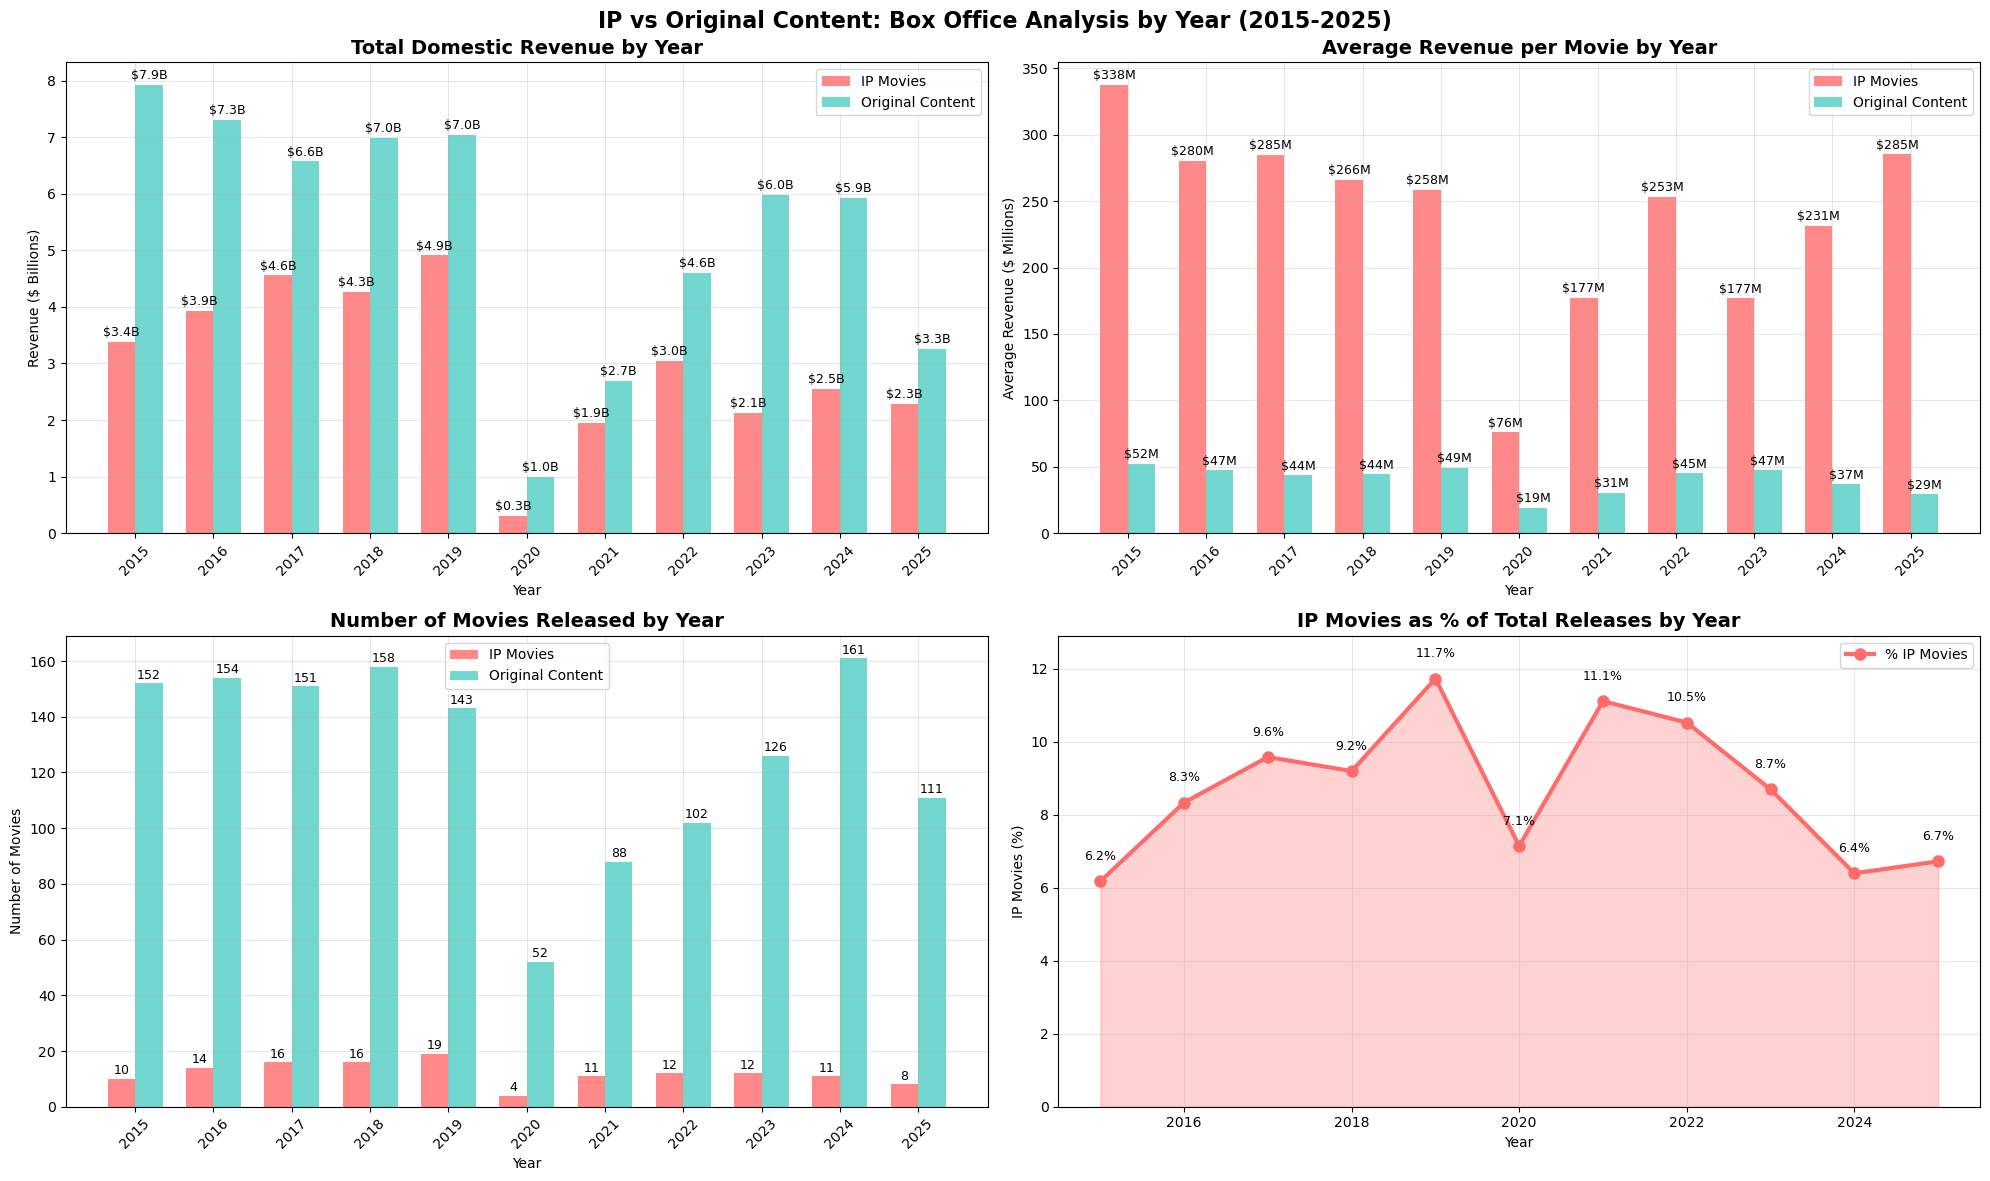


🎬 IP vs Original Content Analysis (2015-2025):

Overall Statistics:
Total IP movies: 133 (8.7%)
Total original content: 1,398 (91.3%)
IP total revenue: $33.27B (36.0%)
Original total revenue: $59.27B (64.0%)

Average Revenue per Movie:
IP movies: $250.1M
Original content: $42.4M
IP advantage: 490%

Year-over-Year Trends:
------------------------------
IP percentage range: 6.2% - 11.7%
Highest IP year: 2019 (11.7%)
Lowest IP year: 2015 (6.2%)
Best IP revenue year: 2019.0 ($4.9B)
Best original revenue year: 2015.0 ($7.9B)


In [7]:
### IP vs Original Content Analysis by Year

# Create yearly comparison data
years = sorted(df['release_year'].unique())
ip_vs_original_data = []

for year in years:
    year_data = df[df['release_year'] == year]
    
    # IP movies stats
    ip_movies = year_data[year_data['is_ip_movie'] == 1]
    ip_count = len(ip_movies)
    ip_total_revenue = ip_movies['revenue_domestic'].sum()
    ip_avg_revenue = ip_movies['revenue_domestic'].mean() if ip_count > 0 else 0
    
    # Original content stats
    original_movies = year_data[year_data['is_ip_movie'] == 0]
    original_count = len(original_movies)
    original_total_revenue = original_movies['revenue_domestic'].sum()
    original_avg_revenue = original_movies['revenue_domestic'].mean() if original_count > 0 else 0
    
    ip_vs_original_data.append({
        'year': year,
        'ip_count': ip_count,
        'original_count': original_count,
        'ip_total_revenue': ip_total_revenue,
        'original_total_revenue': original_total_revenue,
        'ip_avg_revenue': ip_avg_revenue,
        'original_avg_revenue': original_avg_revenue,
        'total_movies': ip_count + original_count,
        'ip_percentage': (ip_count / (ip_count + original_count) * 100) if (ip_count + original_count) > 0 else 0
    })

ip_df = pd.DataFrame(ip_vs_original_data)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('IP vs Original Content: Box Office Analysis by Year (2015-2025)', fontsize=16, fontweight='bold')

# Color scheme
ip_color = '#FF6B6B'      # Red for IP
original_color = '#4ECDC4' # Teal for Original

# 1. Total Revenue Comparison
ax1 = axes[0, 0]
x = np.arange(len(years))
width = 0.35

bars1 = ax1.bar(x - width/2, ip_df['ip_total_revenue'] / 1e9, width, 
               label='IP Movies', color=ip_color, alpha=0.8)
bars2 = ax1.bar(x + width/2, ip_df['original_total_revenue'] / 1e9, width,
               label='Original Content', color=original_color, alpha=0.8)

ax1.set_title('Total Domestic Revenue by Year', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue ($ Billions)')
ax1.set_xticks(x)
ax1.set_xticklabels(years, rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                    f'${height:.1f}B', ha='center', va='bottom', fontsize=9)

# 2. Average Revenue per Movie
ax2 = axes[0, 1]
bars3 = ax2.bar(x - width/2, ip_df['ip_avg_revenue'] / 1e6, width,
               label='IP Movies', color=ip_color, alpha=0.8)
bars4 = ax2.bar(x + width/2, ip_df['original_avg_revenue'] / 1e6, width,
               label='Original Content', color=original_color, alpha=0.8)

ax2.set_title('Average Revenue per Movie by Year', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Revenue ($ Millions)')
ax2.set_xticks(x)
ax2.set_xticklabels(years, rotation=45)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add value labels
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax2.text(bar.get_x() + bar.get_width()/2., height + 2,
                    f'${height:.0f}M', ha='center', va='bottom', fontsize=9)

# 3. Movie Count Comparison
ax3 = axes[1, 0]
bars5 = ax3.bar(x - width/2, ip_df['ip_count'], width,
               label='IP Movies', color=ip_color, alpha=0.8)
bars6 = ax3.bar(x + width/2, ip_df['original_count'], width,
               label='Original Content', color=original_color, alpha=0.8)

ax3.set_title('Number of Movies Released by Year', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Number of Movies')
ax3.set_xticks(x)
ax3.set_xticklabels(years, rotation=45)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Add value labels
for bars in [bars5, bars6]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9)

# 4. IP Percentage Over Time
ax4 = axes[1, 1]
line = ax4.plot(years, ip_df['ip_percentage'], marker='o', linewidth=3, 
                markersize=8, color=ip_color, label='% IP Movies')
ax4.fill_between(years, ip_df['ip_percentage'], alpha=0.3, color=ip_color)

ax4.set_title('IP Movies as % of Total Releases by Year', fontsize=14, fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('IP Movies (%)')
ax4.set_ylim(0, max(ip_df['ip_percentage']) * 1.1)
ax4.grid(True, alpha=0.3)
ax4.legend()

# Add value labels on line
for i, (year, pct) in enumerate(zip(years, ip_df['ip_percentage'])):
    ax4.text(year, pct + 0.5, f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n🎬 IP vs Original Content Analysis ({min(years)}-{max(years)}):")
print("=" * 60)

total_ip = df['is_ip_movie'].sum()
total_original = len(df) - total_ip
total_ip_revenue = df[df['is_ip_movie'] == 1]['revenue_domestic'].sum()
total_original_revenue = df[df['is_ip_movie'] == 0]['revenue_domestic'].sum()

print(f"\nOverall Statistics:")
print(f"Total IP movies: {total_ip:,} ({total_ip/len(df)*100:.1f}%)")
print(f"Total original content: {total_original:,} ({total_original/len(df)*100:.1f}%)")
print(f"IP total revenue: ${total_ip_revenue/1e9:.2f}B ({total_ip_revenue/(total_ip_revenue+total_original_revenue)*100:.1f}%)")
print(f"Original total revenue: ${total_original_revenue/1e9:.2f}B ({total_original_revenue/(total_ip_revenue+total_original_revenue)*100:.1f}%)")

avg_ip = df[df['is_ip_movie'] == 1]['revenue_domestic'].mean()
avg_original = df[df['is_ip_movie'] == 0]['revenue_domestic'].mean()
print(f"\nAverage Revenue per Movie:")
print(f"IP movies: ${avg_ip/1e6:.1f}M")
print(f"Original content: ${avg_original/1e6:.1f}M")
print(f"IP advantage: {(avg_ip/avg_original - 1)*100:.0f}%")

# Year-over-year trends
print(f"\nYear-over-Year Trends:")
print("-" * 30)
print(f"IP percentage range: {ip_df['ip_percentage'].min():.1f}% - {ip_df['ip_percentage'].max():.1f}%")
print(f"Highest IP year: {ip_df.loc[ip_df['ip_percentage'].idxmax(), 'year']} ({ip_df['ip_percentage'].max():.1f}%)")
print(f"Lowest IP year: {ip_df.loc[ip_df['ip_percentage'].idxmin(), 'year']} ({ip_df['ip_percentage'].min():.1f}%)")

# Best performing years
best_ip_revenue_year = ip_df.loc[ip_df['ip_total_revenue'].idxmax()]
best_original_revenue_year = ip_df.loc[ip_df['original_total_revenue'].idxmax()]
print(f"Best IP revenue year: {best_ip_revenue_year['year']} (${best_ip_revenue_year['ip_total_revenue']/1e9:.1f}B)")
print(f"Best original revenue year: {best_original_revenue_year['year']} (${best_original_revenue_year['original_total_revenue']/1e9:.1f}B)")